In [0]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# upload file
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def upload(name):
  uploaded = drive.CreateFile({'title': name})
  uploaded.SetContentFile(name)
  uploaded.Upload()
  print('Uploaded file with ID {}'.format(uploaded.get('id')))

Read input video

In [0]:
PATH = '/content/drive/My Drive/636/sample_video/'

In [0]:
!ffmpeg -i /content/drive/My\ Drive/636/sample_video/sample_1.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!ffmpeg -i /content/drive/My\ Drive/636/sample_video/sample_2.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

Use openpose to generate frames

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

Generate facial landmarks input from frames

In [0]:
# detect poses of images
!mkdir -p ./openpose/output/1
!cd openpose && ./build/examples/openpose/openpose.bin --video ../drive/My\ Drive/636/sample_video/sample_1.mp4 --write_json output/1/ --display 0 --render_pose 0 --face

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 48.832721 seconds.


In [0]:
!mkdir -p ./openpose/output/2
!mkdir -p ./openpose/output/3
!mkdir -p ./openpose/output/4
!mkdir -p ./openpose/output/5
!cd openpose && ./build/examples/openpose/openpose.bin --video ../drive/My\ Drive/636/sample_video/sample_2.mp4 --write_json output/2/ --display 0 --render_pose 0 --face
!cd openpose && ./build/examples/openpose/openpose.bin --video ../drive/My\ Drive/636/sample_video/sample_3.mp4 --write_json output/3/ --display 0 --render_pose 0 --face
!cd openpose && ./build/examples/openpose/openpose.bin --video ../drive/My\ Drive/636/sample_video/sample_4.mp4 --write_json output/4/ --display 0 --render_pose 0 --face
!cd openpose && ./build/examples/openpose/openpose.bin --video ../drive/My\ Drive/636/sample_video/sample_5.mp4 --write_json output/5/ --display 0 --render_pose 0 --face

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 88.861908 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 82.471193 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 82.938859 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 82.911230 seconds.


In [0]:
import json
import pandas as pd
import numpy as np
import os, os.path

In [0]:
N_FEATURES = 210
folderpath = './openpose/output/'
COL_NAMES = ['f_' + str(i) for i in range(N_FEATURES)]

In [0]:
def json_to_df(folderpath):
  row = 0
  matrix = []
  for name in os.listdir(folderpath):
    if (name[-4:] == 'json'):
      filepath = os.path.join(folderpath, name)
      if os.path.isfile(filepath):
        with open(filepath, 'r') as f:
          data = json.load(f)['people']
          if len(data) > 0:
            matrix.append([])
            for j in range(N_FEATURES):
              matrix[row].append(float(data[0]['face_keypoints_2d'][j]))
          else:
            cur_row = [0 for i in range(210)]
            matrix.append(cur_row)
          row += 1
  df = pd.DataFrame(matrix, columns = COL_NAMES)
  return df

In [0]:
def upload_csv(df, i):
  name = 'sample_' + str(i) + '.csv'
  df.to_csv(name, index=False)
  upload(name)

In [0]:
# upload to google drive
for i in range(1, 6):
  path = folderpath + str(i) + '/'
  df = json_to_df(path)
  upload_csv(df, i)

Uploaded file with ID 1qyXdHCYfSrWwx8K3Td9skpl-0zb25SaZ
Uploaded file with ID 1Ax1Ru-1v_ewJTvL4IH0nG744wYtIfVhr
Uploaded file with ID 1fIdF2XpGGMFV3LvUh9Fz_mKCs6qrvBum
Uploaded file with ID 1MNF6ZL17cncWU45X9SB4h40ff81oLfgq


In [0]:
# for use now
df_list = []
for i in range(1, 6):
  path = folderpath + str(i) + '/'
  df = json_to_df(path)
  df_list.append(df)

In [0]:
df_list

[         f_0      f_1       f_2      f_3  ...     f_206    f_207    f_208     f_209
 0    309.718  153.847  0.544725  307.874  ...  0.780718  483.054  155.691  0.769683
 1    457.690  292.732  0.774906  457.690  ...  0.792996  616.761  300.786  0.910226
 2    116.855  262.936  0.833653  116.855  ...  0.873616  246.023  253.204  0.899584
 3    827.805  237.288  0.713919  827.805  ...  0.863868  928.470  232.754  0.994991
 4    821.223  233.520  0.731911  821.223  ...  0.851443  921.981  226.258  0.989781
 ..       ...      ...       ...      ...  ...       ...      ...      ...       ...
 445  828.060  259.523  0.659402  826.290  ...  0.835253  923.665  254.212  0.936179
 446  604.106  284.418  0.804550  609.623  ...  0.826365  843.151  223.738  0.868391
 447  193.188  275.480  0.715532  204.939  ...  0.742206  390.332  241.535  0.893546
 448    0.000    0.000  0.000000    0.000  ...  0.000000    0.000    0.000  0.000000
 449  731.624  237.461  0.711868  730.593  ...  0.813416  842.013

In [0]:
df_1 = pd.read_csv('./drive/My Drive/sample_1.csv')

In [0]:
df_1

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209
0,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.00000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,...,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000,0.00,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.00,0.000000,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000,0.00000
1,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.00000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,...,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000,0.00,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.00,0.000000,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000,0.00000
2,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.00000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,...,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000,0.00,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.00,0.000000,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000,0.00000
3,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.00000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,...,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000,0.00,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.00,0.000000,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000,0.00000
4,671.635,150.925,0.013022,641.625,133.963,0.008043,624.228,192.243,0.039591,662.501,151.795,0.035673,644.669,150.925,0.0018,655.107,154.405,0.00942,672.069,153.97,0.025776,654.673,154.405,0.003843,654.238,154.405,0.002604,666.415,151.795,0.004209,667.72,152.23,0.000541,679.463,185.719,0.003331,675.114,168.757,0.056902,675.114,...,0.000842,654.673,154.405,0.000666,672.504,153.1,0.000387,669.46,154.405,0.000421,669.46,155.274,0.003416,671.2,152.665,0.007173,675.114,151.795,0.011006,669.025,151.36,0.001581,669.46,151.36,0.004013,672.069,153.97,0.001272,671.2,152.665,0.012587,671.2,153.535,0.005245,672.939,153.97,0.038927,675.984,155.274,-0.00003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.0000,0.000,0.000,0.00000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,...,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000,0.00,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000,0.000000,0.000,0.000,0.00

Reshape Data into Segments and Prepare for Keras

In [0]:
# slice every 10 frame as a segment until the last frame reaches the end
def get_segments_and_timestamps(df, fps, STEP):
  slices = []
  ts = []
  size = df.shape[0]
  i = STEP
  if size >= STEP:
    while i <= size:
      if i >= STEP:
        slices.append(df.values[df.index[i - STEP : i]])
        ts.append(i/fps)
      i += 1
  else:
    slice_ = df.values
    fillzero = np.zeros((STEP - size, N_FEATURES))
    slice_ = np.concatenate((slice_, fillzero), axis=0)
    slices.append(slice_)
  slices_arr = np.asarray(slices, dtype= np.float32)
  ts_arr = np.asarray(ts, dtype= np.float32)
  return slices_arr, ts_arr

In [0]:
X_arr, ts_arr = get_segments_and_timestamps(df_1, 24, 10)

Load model and weight

In [0]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import Dense, LSTM, LSTM, Dropout, Flatten
from keras.callbacks import History, EarlyStopping
from keras.models import load_model

Using TensorFlow backend.


In [0]:
# def create_model():
#   model = Sequential()
#   # now the model will take as input arrays of shape (*, *)
#   # and output arrays of shape (*, 32)
#   # after the first layer, you don't need to specify
#   # the size of the input anymore:
#   model.add(Dense(32, activation='relu'))
#   model.add(LSTM(32))
#   model.add(Dense(1, activation='sigmoid'))
#   model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#   return model

In [0]:
# Load the model
def load_model_trained():
  model = drive.CreateFile({'id': '1lP5U2z7OMAW9-qocQAXJr_OsVKtpGLtw'})                       
  model.GetContentFile('model.h5') 
  model = load_model('model.h5')

Make prediction

In [0]:
y_pred = model.predict(X_arr)

Draw figure

In [0]:
import matplotlib.pyplot as plt
from google.colab import files

def drawplt(time, pred):
  plt.figure(figsize=(15,10))
  # plt.plot(time, pred, 'b', label='prediction', markersize=1)
  plt.plot(time, pred, 'bo', label='prediction', markersize=3, color='red')
  plt.title('Prediction over time')
  plt.legend()
  plt.show()

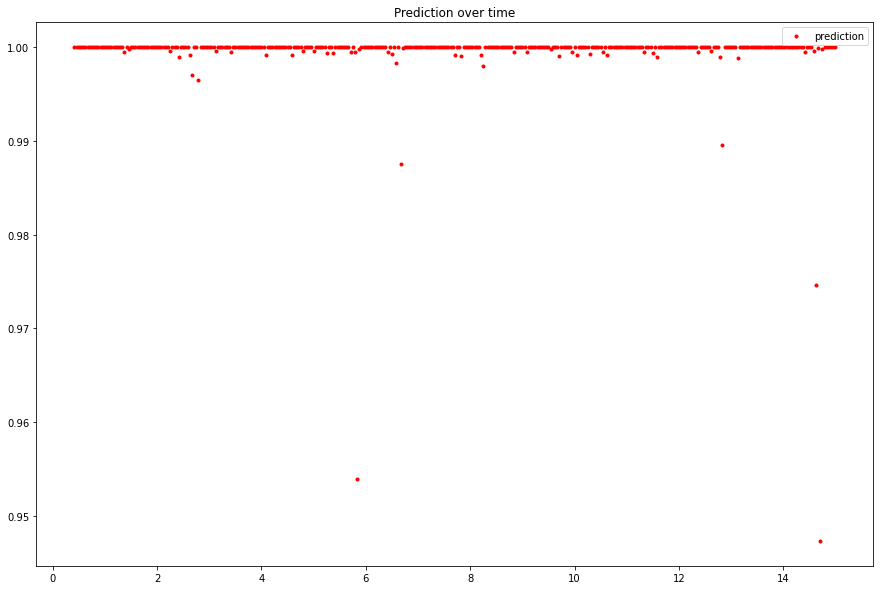

In [226]:
drawplt(ts_arr, y_pred)

Generate json

In [0]:
def to_json(name):
  np_pred = np.array((ts_arr, y_pred.flatten())).T
  pred_list = np_pred.tolist()
  pred_dict = {"cry":pred_list}
  pred_json = json.dumps(pred_dict)
  with open(name, 'w') as json_file:
    json_file.write(pred_json)
  upload(name)

In [232]:
to_json('sample_1.json')

Uploaded file with ID 1g9W7g-VimoZbAFwsml7EkCgzoadq4rSR


Automation

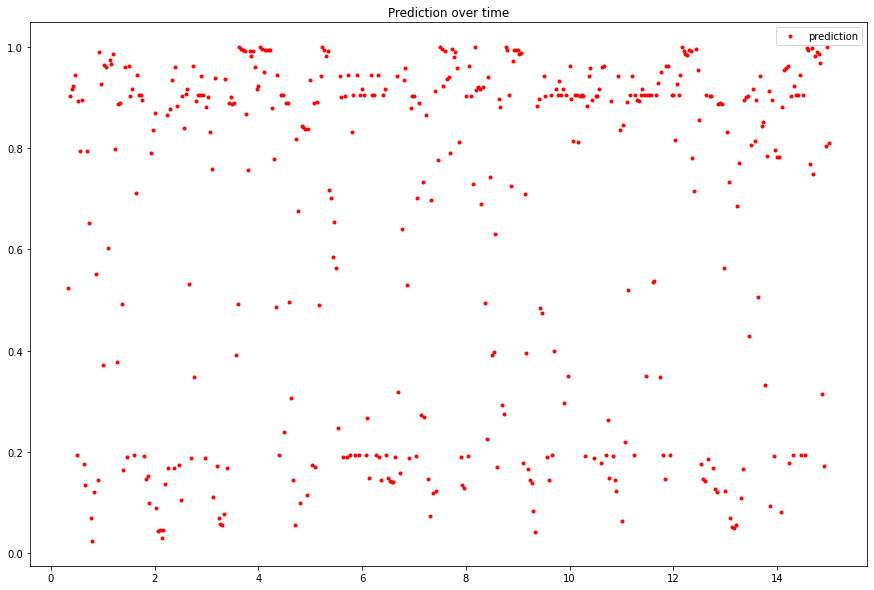

Uploaded file with ID 1LH0zaJE03QOLQzundhgU73dsPTkn-h-1


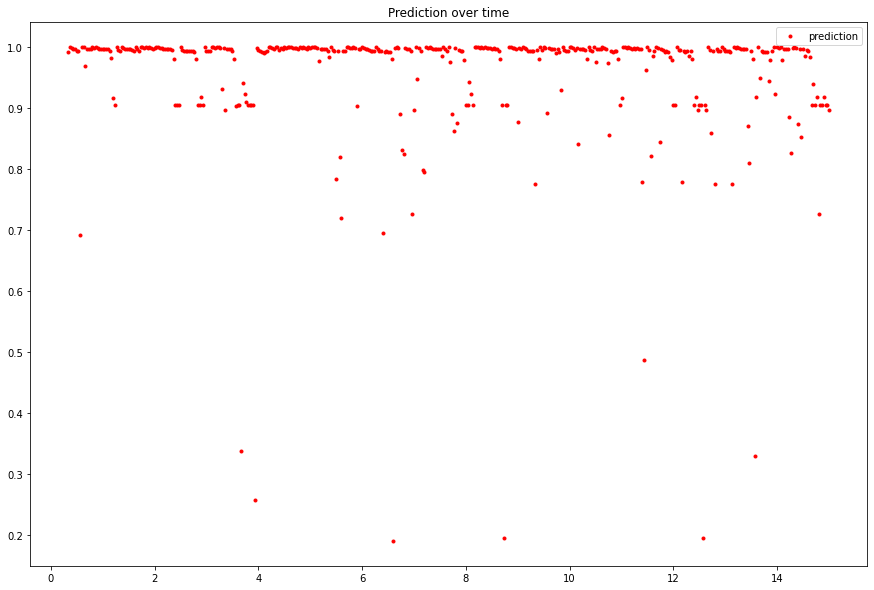

Uploaded file with ID 1__6CPOg89-IwOijDEH8XgX8yFLBfOrEi


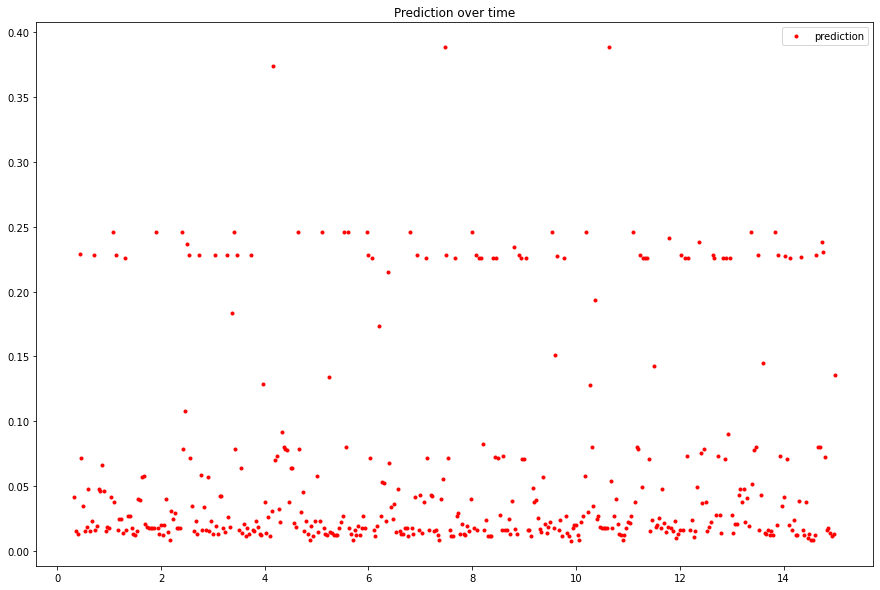

Uploaded file with ID 1St8kPYwIojjrIc4fGJOjU0fNMWEnrWQY


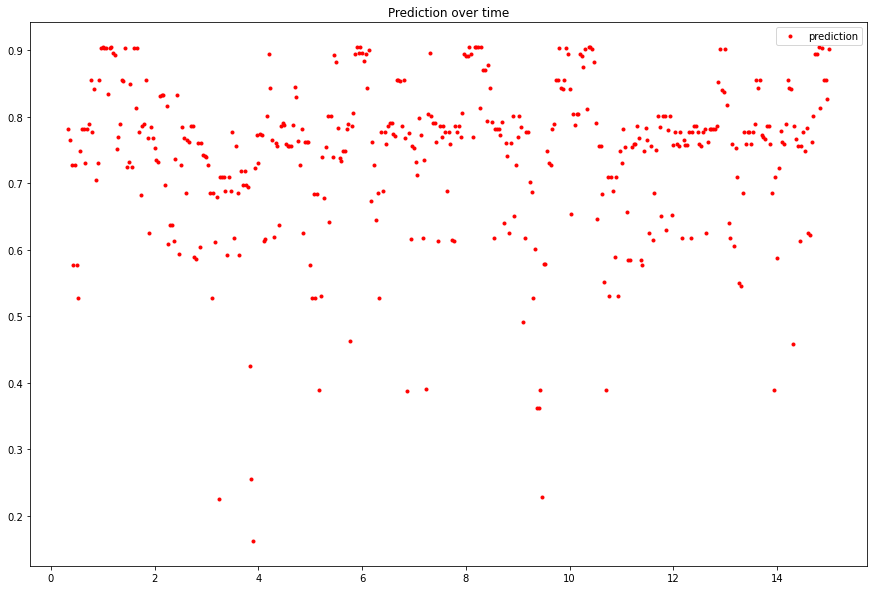

Uploaded file with ID 1nr8ayuYQbb0GshVYV4GXC0NTvqL-3xyS


In [229]:
# load_model_trained()
for i in range(len(df_list)):
  # get dataframe
  df = df_list[i]
  # get input and timestamp
  X_arr, ts_arr = get_segments_and_timestamps(df, 30, 10)
  # get prediction
  y_pred = model.predict(X_arr)
  # draw plot
  drawplt(ts_arr, y_pred)
  # output json file
  json_name = 'sample_' + str(i + 2) + '.json'
  to_json(json_name)